## Libaries importing

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

## Insights

In [2]:
#Loading
df = pd.read_csv("train.csv").drop(["PassengerId", "Name", "Ticket", "Fare", ], axis=1)
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
743,0,3,male,24.00,1,0,NaN,S
268,1,1,female,58.00,0,1,C125,S
478,0,3,male,22.00,0,0,NaN,S
790,0,3,male,NaN,0,0,NaN,Q
37,0,3,male,21.00,0,0,NaN,S
745,0,1,male,70.00,1,1,B22,S
469,1,3,female,0.75,2,1,NaN,C
564,0,3,female,NaN,0,0,NaN,S
280,0,3,male,65.00,0,0,NaN,Q
532,0,3,male,17.00,1,1,NaN,C


Text(0.5, 1.0, 'Total Persons = 891')

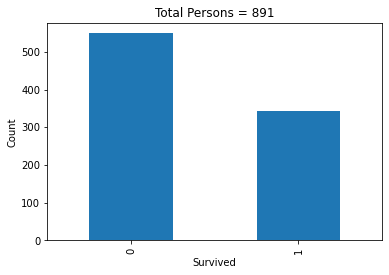

In [3]:
pd.value_counts(df.Survived).plot.bar()
plt.ylabel("Count");plt.xlabel("Survived")
plt.title(f"Total Persons = {sum(pd.value_counts(df.Survived))}")

## Data Processing

In [4]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object

In [5]:
df = df.replace('NaN', np.nan)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df = df.drop('Cabin', axis=1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


## Missing value handling

In [7]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [8]:
#Droping Emabarked 2 rows having nan

df.Embarked.loc[df.Embarked.isna() == True].index

Int64Index([61, 829], dtype='int64')

In [9]:
df = df.drop([61, 829])

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [11]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [12]:
# Dummies for Gender

df.Sex = pd.get_dummies(df.Sex, drop_first=True)

In [13]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S


In [14]:
Embarked_dummies = pd.get_dummies(df.Embarked, drop_first=True, prefix = 'Embarked')
Embarked_dummies.head(2)

,Embarked_Q,Embarked_S
0,0,1
1,0,0


In [15]:
Pclass_dummies = pd.get_dummies(df.Pclass, drop_first=True, prefix='Pclass')
Pclass_dummies.head(2)

,Pclass_2,Pclass_3
0,0,1
1,0,0


In [16]:
df = df.drop(['Pclass', 'Embarked'], axis=1)

In [17]:
df.head(2)

,Survived,Sex,Age,SibSp,Parch
0,0,1,22.0,1,0
1,1,0,38.0,1,0


In [18]:
df = pd.concat([df, Pclass_dummies, Embarked_dummies], axis = 1)

In [19]:
df.head(2)

,Survived,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0


### Using Iterative Imputer for handling missing value in Age

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
imputer = IterativeImputer(max_iter=10000, random_state=0)

In [22]:
features = df.drop("Survived", axis=1)
labels = df.Survived

In [23]:
features.head(2)

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0


In [24]:
imputer.fit(features)
df_feautes = imputer.transform(features)

In [25]:
features = pd.DataFrame(df_feautes, columns=features.columns)

In [26]:
(features.Age.isna()==True).sum()

0

In [27]:
features.dtypes

Sex           float64
Age           float64
SibSp         float64
Parch         float64
Pclass_2      float64
Pclass_3      float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [28]:
features.isna().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Pclass_2      0
Pclass_3      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [62]:
full_features = pd.concat([features, labels], axis=1)
full_features.head(2)

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


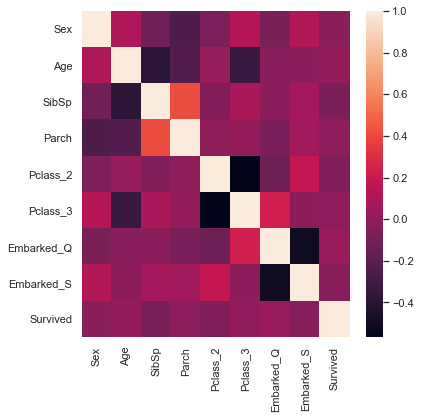

In [77]:
plt.figure(figsize=(6,6))
sns.heatmap(full_features.corr());

## Modeling

In [29]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [30]:
features.head(3)

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0


In [31]:
assert len(labels) == len(features)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = 0)

0.757847533632287

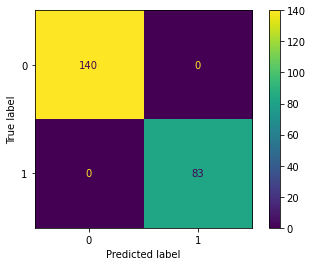

In [60]:
log_model = LogisticRegression().fit(x_train,y_train)
y_pred = log_model.predict(x_test)
plot_confusion_matrix(log_model, x_test, y_pred)
accuracy_score(y_pred, y_test)

0.757847533632287

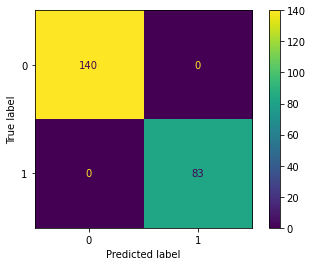

In [61]:
log_model = LogisticRegression(penalty='l2', random_state=44).fit(x_train,y_train)
y_pred = log_model.predict(x_test)
plot_confusion_matrix(log_model, x_test, y_pred)
accuracy_score(y_pred, y_test)

In [69]:
full_features.corr().T

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Survived
Sex,1.000000,0.117109,-0.116348,-0.247508,-0.066459,0.134227,-0.075217,0.121405,-0.023116
Age,0.117109,1.000000,-0.386958,-0.226887,0.025992,-0.340021,-0.022710,-0.013648,0.020254
SibSp,-0.116348,-0.386958,1.000000,0.414542,-0.056507,0.091515,-0.026692,0.069438,-0.078454
Parch,-0.247508,-0.226887,0.414542,1.000000,-0.001278,0.014634,-0.081585,0.061512,-0.010241
Pclass_2,-0.066459,0.025992,-0.056507,-0.001278,1.000000,-0.567432,-0.127705,0.190824,-0.062726
Pclass_3,0.134227,-0.340021,0.091515,0.014634,-0.567432,1.000000,0.237035,-0.013594,0.006282
Embarked_Q,-0.075217,-0.022710,-0.026692,-0.081585,-0.127705,0.237035,1.000000,-0.499261,0.037671
Embarked_S,0.121405,-0.013648,0.069438,0.061512,0.190824,-0.013594,-0.499261,1.000000,-0.033024
Survived,-0.023116,0.020254,-0.078454,-0.010241,-0.062726,0.006282,0.037671,-0.033024,1.000000


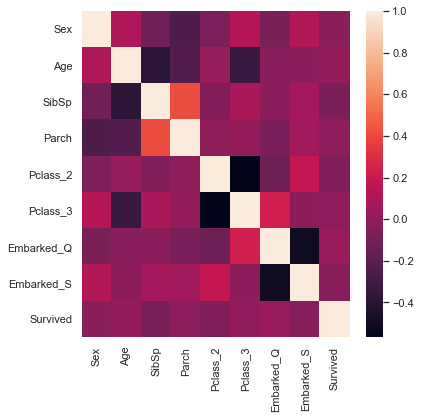